In [67]:
# Import
import numpy as np
from PIL import Image
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16
     
import warnings
warnings.filterwarnings("ignore") 

In [45]:


# Create Generator
image_generator = ImageDataGenerator(preprocessing_function = preprocess_input)
  

In [48]:

# Create Data Loaders
train_loader = image_generator.flow_from_directory(
    directory = 'intel/reduced_seg_train_new',
    target_size = (224, 224),
    batch_size = 50,
    shuffle = True
)

test_loader = image_generator.flow_from_directory(
    directory ='Intel_Image_Classification/Intel/reduced_seg_test_new',
    target_size = (224, 224),
    batch_size = 50,
    shuffle = True
)


Found 2804 images belonging to 6 classes.
Found 598 images belonging to 6 classes.
Found 0 images belonging to 0 classes.


In [28]:
train_loader.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [29]:
idx_to_class = {val:key for key, val in dict(train_loader.class_indices).items()}
idx_to_class

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [30]:
model = Sequential()
model.add(VGG16(include_top = False, pooling = "avg"))
model.add(Dense(6, activation = "softmax"))

In [31]:
model.layers[0].trainable = False

In [32]:

# Train and Test Steps
steps_train = len(train_loader)    # = round(num_train_images / batch_size)
steps_test = len(test_loader)

In [34]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])


In [68]:

train_loss = []  
val_loss = []    
train_accuracy = [] 
val_accuracy = []    

epochs = 5

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    
    # Fit the model for one epoch using the entire training dataset
    model_train_history = model.fit(
        train_loader,
        steps_per_epoch=steps_train,  # Number of steps per epoch
        epochs=1,  # Train for one epoch
        validation_data=test_loader,
        validation_steps=steps_test  # Number of validation steps
    )
    
    # Append the loss and accuracy values for the current epoch
    train_loss.append(model_train_history.history['loss'][0])
    val_loss.append(model_train_history.history['val_loss'][0])
    train_accuracy.append(model_train_history.history['accuracy'][0])
    val_accuracy.append(model_train_history.history['val_accuracy'][0])

# Print the loss and accuracy for each epoch
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}:")
    print(f"Training Loss: {train_loss[epoch]}, Training Accuracy: {train_accuracy[epoch]}")
    print(f"Validation Loss: {val_loss[epoch]}, Validation Accuracy: {val_accuracy[epoch]}")


Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 279s 5s/step - accuracy: 0.9042 - loss: 0.2945 - val_accuracy: 0.8612 - val_loss: 0.4954
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 277s 5s/step - accuracy: 0.9250 - loss: 0.2412 - val_accuracy: 0.8612 - val_loss: 0.5019
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 259s 5s/step - accuracy: 0.9196 - loss: 0.2343 - val_accuracy: 0.8645 - val_loss: 0.4852
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 267s 5s/step - accuracy: 0.9323 - loss: 0.1912 - val_accuracy: 0.8629 - val_loss: 0.4611
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 275s 5s/step - accuracy: 0.9382 - loss: 0.1822 - val_accuracy: 0.8729 - val_loss: 0.4662
Epoch 1:
Training Loss: 0.271918386220932, Training Accuracy: 0.909771740436554
Validation Loss: 0.49542486667633057, Validation Accuracy: 0.8612040281295776
Epoch 2:
Training Loss: 0.24413785338401794, Training Accuracy: 0.9204707741737366
Validation Loss: 0.5019193887710571, Validation Accuracy: 0.8612040281295776
Epoch 3:
Training Loss: 0.2238422930240631, Training

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step


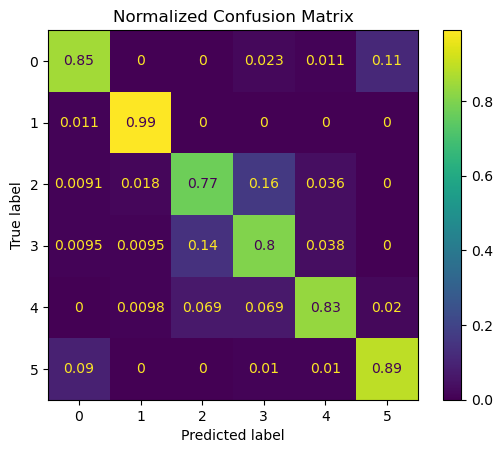

In [60]:
# Extract true labels and predicted labels for confusion matrix
true_labels = []
predicted_labels = []
for i in range(len(test_loader)):
    images, labels = test_loader[i]
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))
    true_labels.extend(np.argmax(labels, axis=1))

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Normalize confusion matrix
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Display normalized confusion matrix
disp = ConfusionMatrixDisplay(normalized_conf_matrix)
disp.plot()
plt.title('Normalized Confusion Matrix')
plt.show()



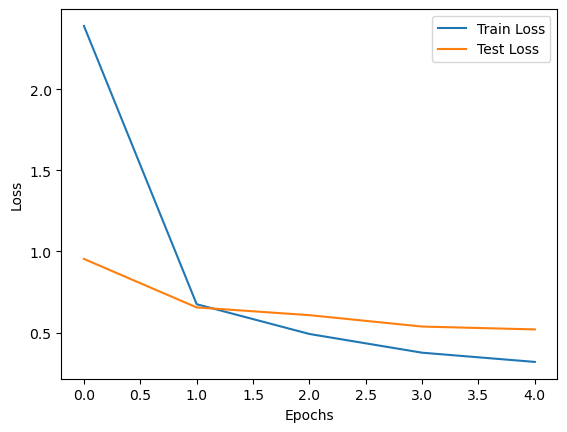

In [61]:
import matplotlib.pyplot as plt
plt.plot(range(5), train_loss, label = "Train Loss")
plt.plot(range(5), val_loss, label = "Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

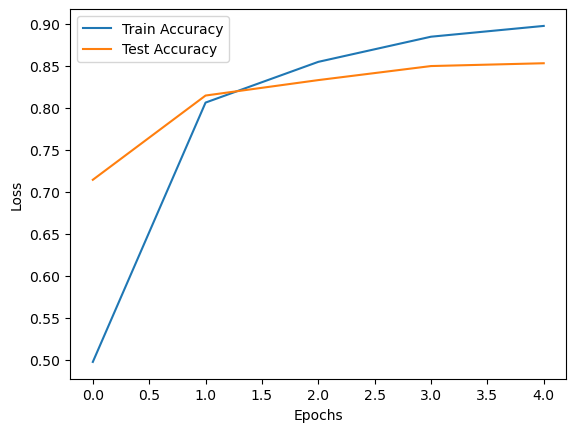

In [62]:
plt.plot(range(5), train_accuracy, label = "Train Accuracy")
plt.plot(range(5), val_accuracy, label = "Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [63]:
pred_img_list = [f"Intel_Image_Classification/Intel/seg_pred/seg_pred/{i}" for i in os.listdir("Intel_Image_Classification/Intel/seg_pred/seg_pred")]     


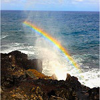

4
sea


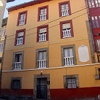

0
buildings


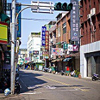

5
street


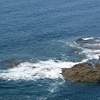

4
sea


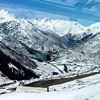

2
glacier


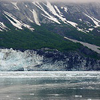

2
glacier


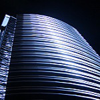

0
buildings


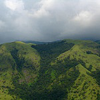

4
sea


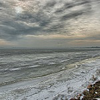

4
sea


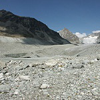

2
glacier


In [65]:

import random
for i in range(10):
  num = random.randint(0, len(pred_img_list))
  img = Image.open(pred_img_list[num])
  display(img.resize((100,100)))
  img = img.resize((224, 224))
  img_array = np.array(img)
  img_array = img_array[np.newaxis, :]
  prob = model(img_array)
  pred = np.argmax(prob)
  print(pred)
  print(idx_to_class[pred])
  print("=======================================")

In [73]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Generate and print classification report
class_report = classification_report(true_labels, predicted_labels, target_names=[str(i) for i in range(6)])
print("Classification Report:")
print(class_report)



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        87
           1       0.96      0.99      0.97        94
           2       0.79      0.77      0.78       110
           3       0.75      0.80      0.77       105
           4       0.89      0.83      0.86       102
           5       0.88      0.89      0.89       100

    accuracy                           0.85       598
   macro avg       0.86      0.86      0.86       598
weighted avg       0.85      0.85      0.85       598

